# H1N1 vaccine prediction

## Importing Libraries

In [31]:
 import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Load and review data

In [32]:
df= pd.read_csv("vaccine_prediction.csv")

In [33]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [34]:
df.shape

(26707, 34)

In [35]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [37]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

## Dropping unnecessary columns

In [38]:
df = df.drop(labels=['unique_id','qualification','race','income_level','marital_status','housing_status','employment','census_msa'], axis=1)
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,sex,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,Female,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,Male,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,Male,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,5.0,5.0,4.0,1.0,65+ Years,Female,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Female,1.0,0.0,0


# Visualising Dataset

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

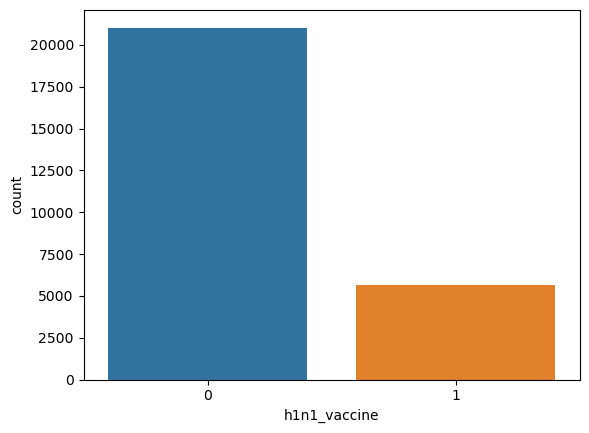

In [39]:
sns.countplot(x="h1n1_vaccine",data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

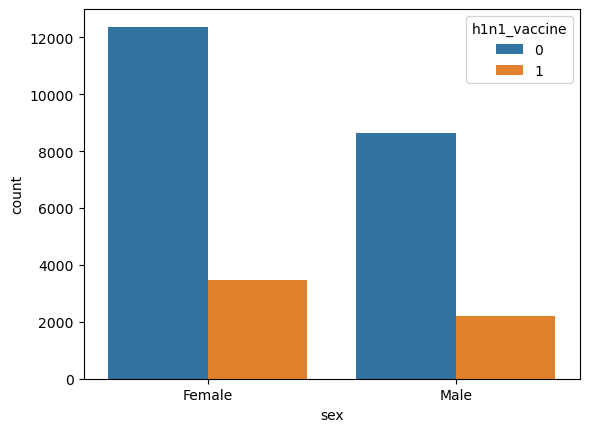

In [40]:
sns.countplot(data=df,x="sex",hue="h1n1_vaccine")

<AxesSubplot:xlabel='age_bracket', ylabel='count'>

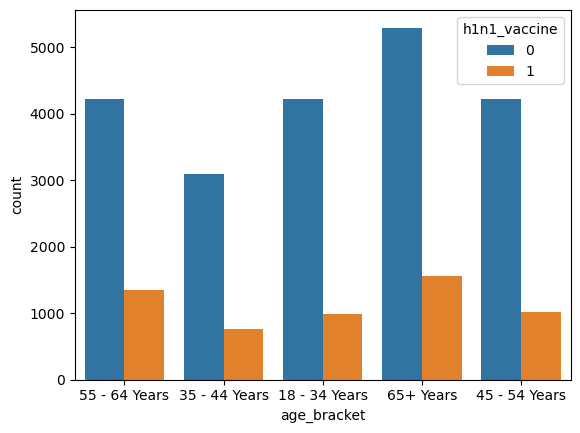

In [41]:
sns.countplot(data=df,x="age_bracket",hue="h1n1_vaccine")

In [ ]:
sns.pairplot(df,diag_kind='kde')

Text(0.5, 1.0, 'Boxplots')

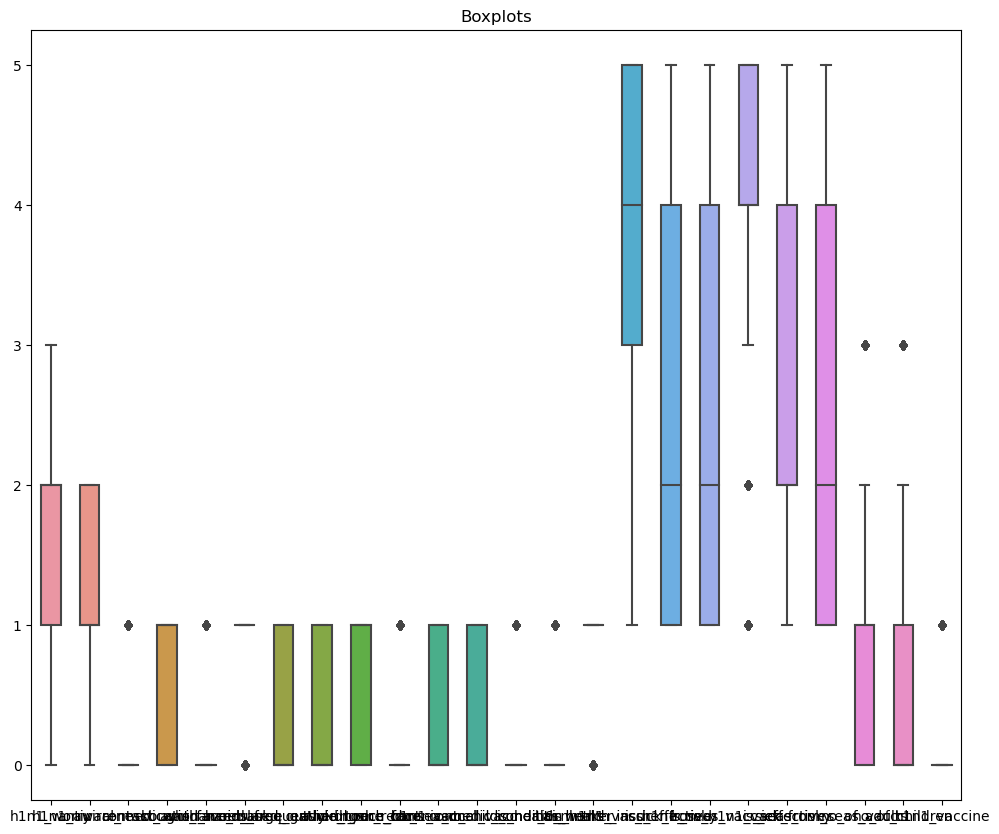

In [42]:
fig,ax = plt.subplots(figsize=(12,10))
sns.boxplot(data=df,width=0.5)
plt.title("Boxplots")

## Creating dummy columns

In [43]:
df = pd.get_dummies(df, columns=['age_bracket','sex'])
df.sample(10)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_18 - 34 Years,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,sex_Female,sex_Male
6583,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,...,2.0,0.0,0,0,0,0,1,0,1,0
15303,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0,1,0,0,0,0,1,0
17001,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0,0,0,1,0,0,0,1
22241,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0,0,0,0,1,0,0,1
7964,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0,0,0,0,1,0,0,1
24357,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,1,0,1
6078,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0,0,0,1,0,0,0,1
19825,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,3.0,0,0,1,0,0,0,1,0
4957,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0,0,0,0,0,1,0,1
7589,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0,1,0,0,0,0,1,0


## Dealing with Missing Values

In [44]:
df.median()

h1n1_worry                   2.0
h1n1_awareness               1.0
antiviral_medication         0.0
contact_avoidance            1.0
bought_face_mask             0.0
wash_hands_frequently        1.0
avoid_large_gatherings       0.0
reduced_outside_home_cont    0.0
avoid_touch_face             1.0
dr_recc_h1n1_vacc            0.0
dr_recc_seasonal_vacc        0.0
chronic_medic_condition      0.0
cont_child_undr_6_mnths      0.0
is_health_worker             0.0
has_health_insur             1.0
is_h1n1_vacc_effective       4.0
is_h1n1_risky                2.0
sick_from_h1n1_vacc          2.0
is_seas_vacc_effective       4.0
is_seas_risky                2.0
sick_from_seas_vacc          2.0
no_of_adults                 1.0
no_of_children               0.0
h1n1_vaccine                 0.0
age_bracket_18 - 34 Years    0.0
age_bracket_35 - 44 Years    0.0
age_bracket_45 - 54 Years    0.0
age_bracket_55 - 64 Years    0.0
age_bracket_65+ Years        0.0
sex_Female                   1.0
sex_Male  

In [45]:
for columns in df:
    df[columns] = df[columns].fillna(df[columns].median())
df.head(15)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_18 - 34 Years,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,sex_Female,sex_Male
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0,0,0,0,1,0,1,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0,0,1,0,0,0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0,1,0,0,0,0,0,1
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,1,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0,0,0,1,0,0,1,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2.0,3.0,0,0,0,0,0,1,0,1
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,1,0,0,1
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,2.0,0.0,1,0,0,1,0,0,1,0
8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0,0,0,1,0,0,0,1
9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0,0,0,0,1,0,0,1


In [46]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
age_bracket_18 - 34 Years    0
age_bracket_35 - 44 Years    0
age_bracket_45 - 54 Years    0
age_bracket_55 - 64 Years    0
age_bracket_65+ Years        0
sex_Female                   0
sex_Male                     0
dtype: int64

# Removing Outliers

In [47]:
def remove_outlier(df_in):
    for i in df_in.columns:
        q1 = df_in[i].quantile(0.25)
        q3 = df_in[i].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_out = df_in.loc[(df_in[i] > fence_low) & (df_in[i] < fence_high)]
    return df_out

In [48]:
df=remove_outlier(df)

In [49]:
df.shape

(26707, 31)

# Heat Map 

In [50]:
sns.heatmap(df,annot=True)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000022B520CA430> (for post_execute):


KeyboardInterrupt: 

## Spliting data

In [13]:
X=df.drop("h1n1_vaccine",axis=1)
y=df["h1n1_vaccine"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=1)

## Logistic Regression

In [15]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\shres\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
model.score(X_train,y_train)

0.8329945437038622

In [17]:
model.score(X_test,y_test)

0.840134780980906

In [18]:
predictions=model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.840134780980906

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[6014,  316],
       [ 965,  718]], dtype=int64)

<AxesSubplot:>

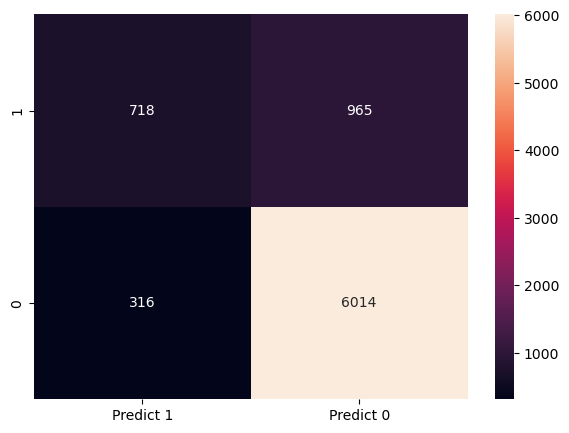

In [21]:
import sklearn.metrics as metrics
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
model2=DecisionTreeClassifier(max_depth=8,criterion='gini')
model2.fit(X_train,y_train)
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))

0.846421311650797
0.8310245850492949


## Bagging

In [24]:
from sklearn.ensemble import BaggingClassifier

In [25]:
model3=BaggingClassifier(n_estimators=50,base_estimator=model2,max_samples=0.5)
model3.fit(X_train,y_train)
print(model3.score(X_train,y_train))
print(model3.score(X_test,y_test))

0.8573873970257837
0.8423811306626732


## Boosting

In [26]:
from sklearn.ensemble import AdaBoostClassifier

In [27]:
model4=AdaBoostClassifier(n_estimators=50,random_state=40,learning_rate=0.5)
model4.fit(X_train,y_train)
print(model4.score(X_train,y_train))
print(model4.score(X_test,y_test))

0.8320851610142291
0.840134780980906


In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
model5=GradientBoostingClassifier(n_estimators=50)
model5.fit(X_train,y_train)
print(model5.score(X_train,y_train))
print(model5.score(X_test,y_test))

0.8350272814806889
0.8423811306626732


In [30]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [ ]:
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

 41%|█████████████████████████████████▉                                                | 12/29 [01:22<03:58, 14.01s/it]